In [1]:
# For wide monitor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import tensorflow as tf

In [3]:
hello = tf.constant('Hello, TensorFlow!') # 노드 생성, 이름은 hello
sess = tf.Session() # 메모리에 올리기

In [4]:
print(sess.run(hello))

b'Hello, TensorFlow!'


In [5]:
import pandas as pd

In [12]:
mnist_csv = pd.read_csv('mnist_train.csv', header=None, skiprows=1).values

In [15]:
print(mnist_csv.shape)

(59999, 785)


In [16]:
print(mnist_csv[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84
 252 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 163 252 252 252 253 252 252  96 189 253 16

In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(mnist_csv, test_size=0.3, random_state=1)

In [18]:
print(train.shape)

(41999, 785)


In [19]:
print(test.shape)

(18000, 785)


In [21]:
mnist_csv[1][0] # label

4

In [22]:
from keras.utils import np_utils
y_train, X_train = np_utils.to_categorical(train[:, 0]), train[:, 1:]
y_test, X_test = np_utils.to_categorical(test[:,0]), test[:, 1:]
print(y_train.shape, X_train.shape)
print(y_test.shape, X_test.shape)

(41999, 10) (41999, 784)
(18000, 10) (18000, 784)


Using TensorFlow backend.


In [23]:
#a<=X<=b
#0<=X-a<=b-a
#0<=(X-a)/(b-a)<=1
#scaling해야함. 딥러닝에서는 이거 안해도 잘 나오긴 함..
X_train = (X_train-0)/255 # normalize
X_test = (X_test-0)/255 # normalize
print(X_train[0])
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

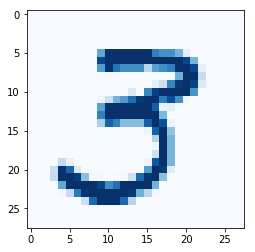

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.reshape(X_train[0], (28,28)), cmap=plt.cm.Blues) # 컬러 이미지면 (28,28,3)

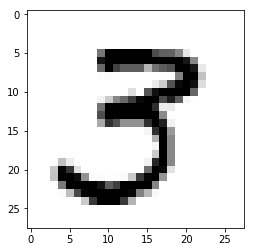

In [27]:
plt.imshow(np.reshape(X_train[0], (28,28)), cmap=plt.cm.gray_r)

In [28]:
# 신경망 입출력 디자인
import tensorflow as tf
X = tf.placeholder(tf.float32, [None, 784]) # constanct는 변하지않는 상수 # placeholder는 임시적으로 저장해놓을 수 있는 통 (데이터가 들락날락할 수 있는)
X_img = tf.reshape(X, [-1, 28, 28, 1])
y = tf.placeholder(tf.float32, [None, 10])

In [29]:
# (28, 28, 1)
W1 = tf.Variable(tf.random_normal([3,3,1,16], stddev=0.01)) # (3,3)채널 16 필터개수
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME') 
# (28, 28, 16)
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') # ksize 이미지 크기 stride 
# (14, 14, 16)
W2 = tf.Variable(tf.random_normal([3,3,16,32], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
# (7, 7, 32)

Instructions for updating:
Colocations handled automatically by placer.


In [35]:
L2_flat=tf.reshape(L2, [-1, 7 * 7 * 32]) #Flatten
W3 =tf.Variable(tf.random_normal([7 * 7 * 32, 10], stddev =0.01))
b =tf.Variable(tf.random_normal([10]))
logits =tf.matmul (L2_flat, W3) + b

In [37]:
# 아키텍처를 설계해보세요 - con pool 의 디자인을 바꾸는것. 호출 개수를 바꾸는 것
# 하이퍼파타미터를 설계해보세요 - 필터 개수, 사이즈 이런걸 바꾸는 것.
#구분할 것
#서로다른 cnn 5개 만들어보세요

learning_rate = 0.001
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [39]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [40]:
training_epochs=10
batch_size=100

In [42]:
for epoch in range(training_epochs): # 눈높이를 몇번 되감느냐
    avg_loss = 0
    total_batch = int(X_train.shape[0]/batch_size)
    for idx in range(total_batch):
        num = (idx*batch_size)%(X_train.shape[0])
        batch_xs = X_train[num:(num+batch_size)]
        batch_ys = y_train[num:(num+batch_size)]
        feed_dict = {X:batch_xs, y:batch_ys}
        c, _ = sess.run([loss, optimizer], feed_dict=feed_dict)
        avg_loss+=c/total_batch
    print("Epoch:", "%04d"%(epoch+1), "loss=", "{:.9f}".format(avg_loss))

Epoch: 0001 loss= 0.722796172
Epoch: 0002 loss= 0.267389250
Epoch: 0003 loss= 0.162899581
Epoch: 0004 loss= 0.115962917
Epoch: 0005 loss= 0.092872243
Epoch: 0006 loss= 0.078940497
Epoch: 0007 loss= 0.068956407
Epoch: 0008 loss= 0.061201615
Epoch: 0009 loss= 0.054840349
Epoch: 0010 loss= 0.049408719


In [44]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_test, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", sess.run(accuracy, feed_dict={X:X_test, y:y_test}))

Accuracy: 0.9773333


In [46]:
from sklearn.metrics import confusion_matrix
import itertools


In [ ]:
# 예쁜 confusion_matrix
def plot_confusion_matrix(pred, label, class_info):
    cnf_matrix = confusion_matrix(label, pred)
    plt.figure()
    plt.imshow(chf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    tick_marks = np.arange(len(class_info))
    plt.xticks(tick_marks, class_info, rotation=45)
    plt.yticks(tick_marks, class_info)
    thresh = cnf_matrix.max()/2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]),
                                 range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i,j], horizontalalignment="center",
                )
    



> def
plot_confusion_matrix pred , label, class_info
>
cnf_matrix = confusion_matrix (label, pred
>
plt.figure
>
plt.imshow cnf_matrix , interpolation='nearest', cmap plt.cm.Blues
>
tick_marks = np.arange len class_info
>
plt.xticks tick_marks , class_info , rotation=
>
plt.yticks tick_marks , class_info
> thresh =
cnf_matrix.max () /
> for
i , j in itertools.product ( cnf_matrix.shape [0]),
range( cnf_matrix.shape [
>
plt.text (j, i , cnf_matrix i , j], horizontalalignment ="center",
> color="white" if
cnf_matrix i , j] > thresh else "
>
plt.tight_layout
>
plt.ylabel ('True
>
plt.xlabel ('Predicted
>
plt.show

In [48]:
from sklearn.metrics import confusion_matrix
prediction = tf.argmax(logits, 1) #argument중에서 max인 값을 받아준다
pred = sess.run(prediction, feed_dict={X:X_test})

In [49]:
print(pred)

[3 3 4 ... 2 0 8]


In [50]:
label = np.argmax(y_test, axis=1)

In [51]:
print(confusion_matrix(label, pred))

[[1722    0    6    0    0    0    6    0    4    1]
 [   0 1959    9    6    2    0    6    4   14    0]
 [   2    4 1792   16    0    0    0    4    8    3]
 [   1    0    5 1832    0    5    0    1    5    1]
 [   0    3    6    4 1693    0    6    2    5   22]
 [   3    0    0   27    0 1581    6    1   15    9]
 [   4    2    2    1    1    2 1708    0    4    0]
 [   2    6   15   42    3    1    0 1808    4   28]
 [   6    2    2    8    2    4    3    1 1765   11]
 [   1    2    0    8    5    1    1    3    9 1732]]
